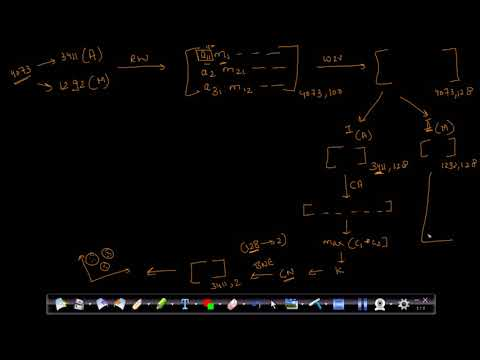

In [1]:
from IPython.display import IFrame, YouTubeVideo
YouTubeVideo(id='Ufe16ie-BPM', width=600)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ego_graph_for_actor.png to ego_graph_for_actor.png


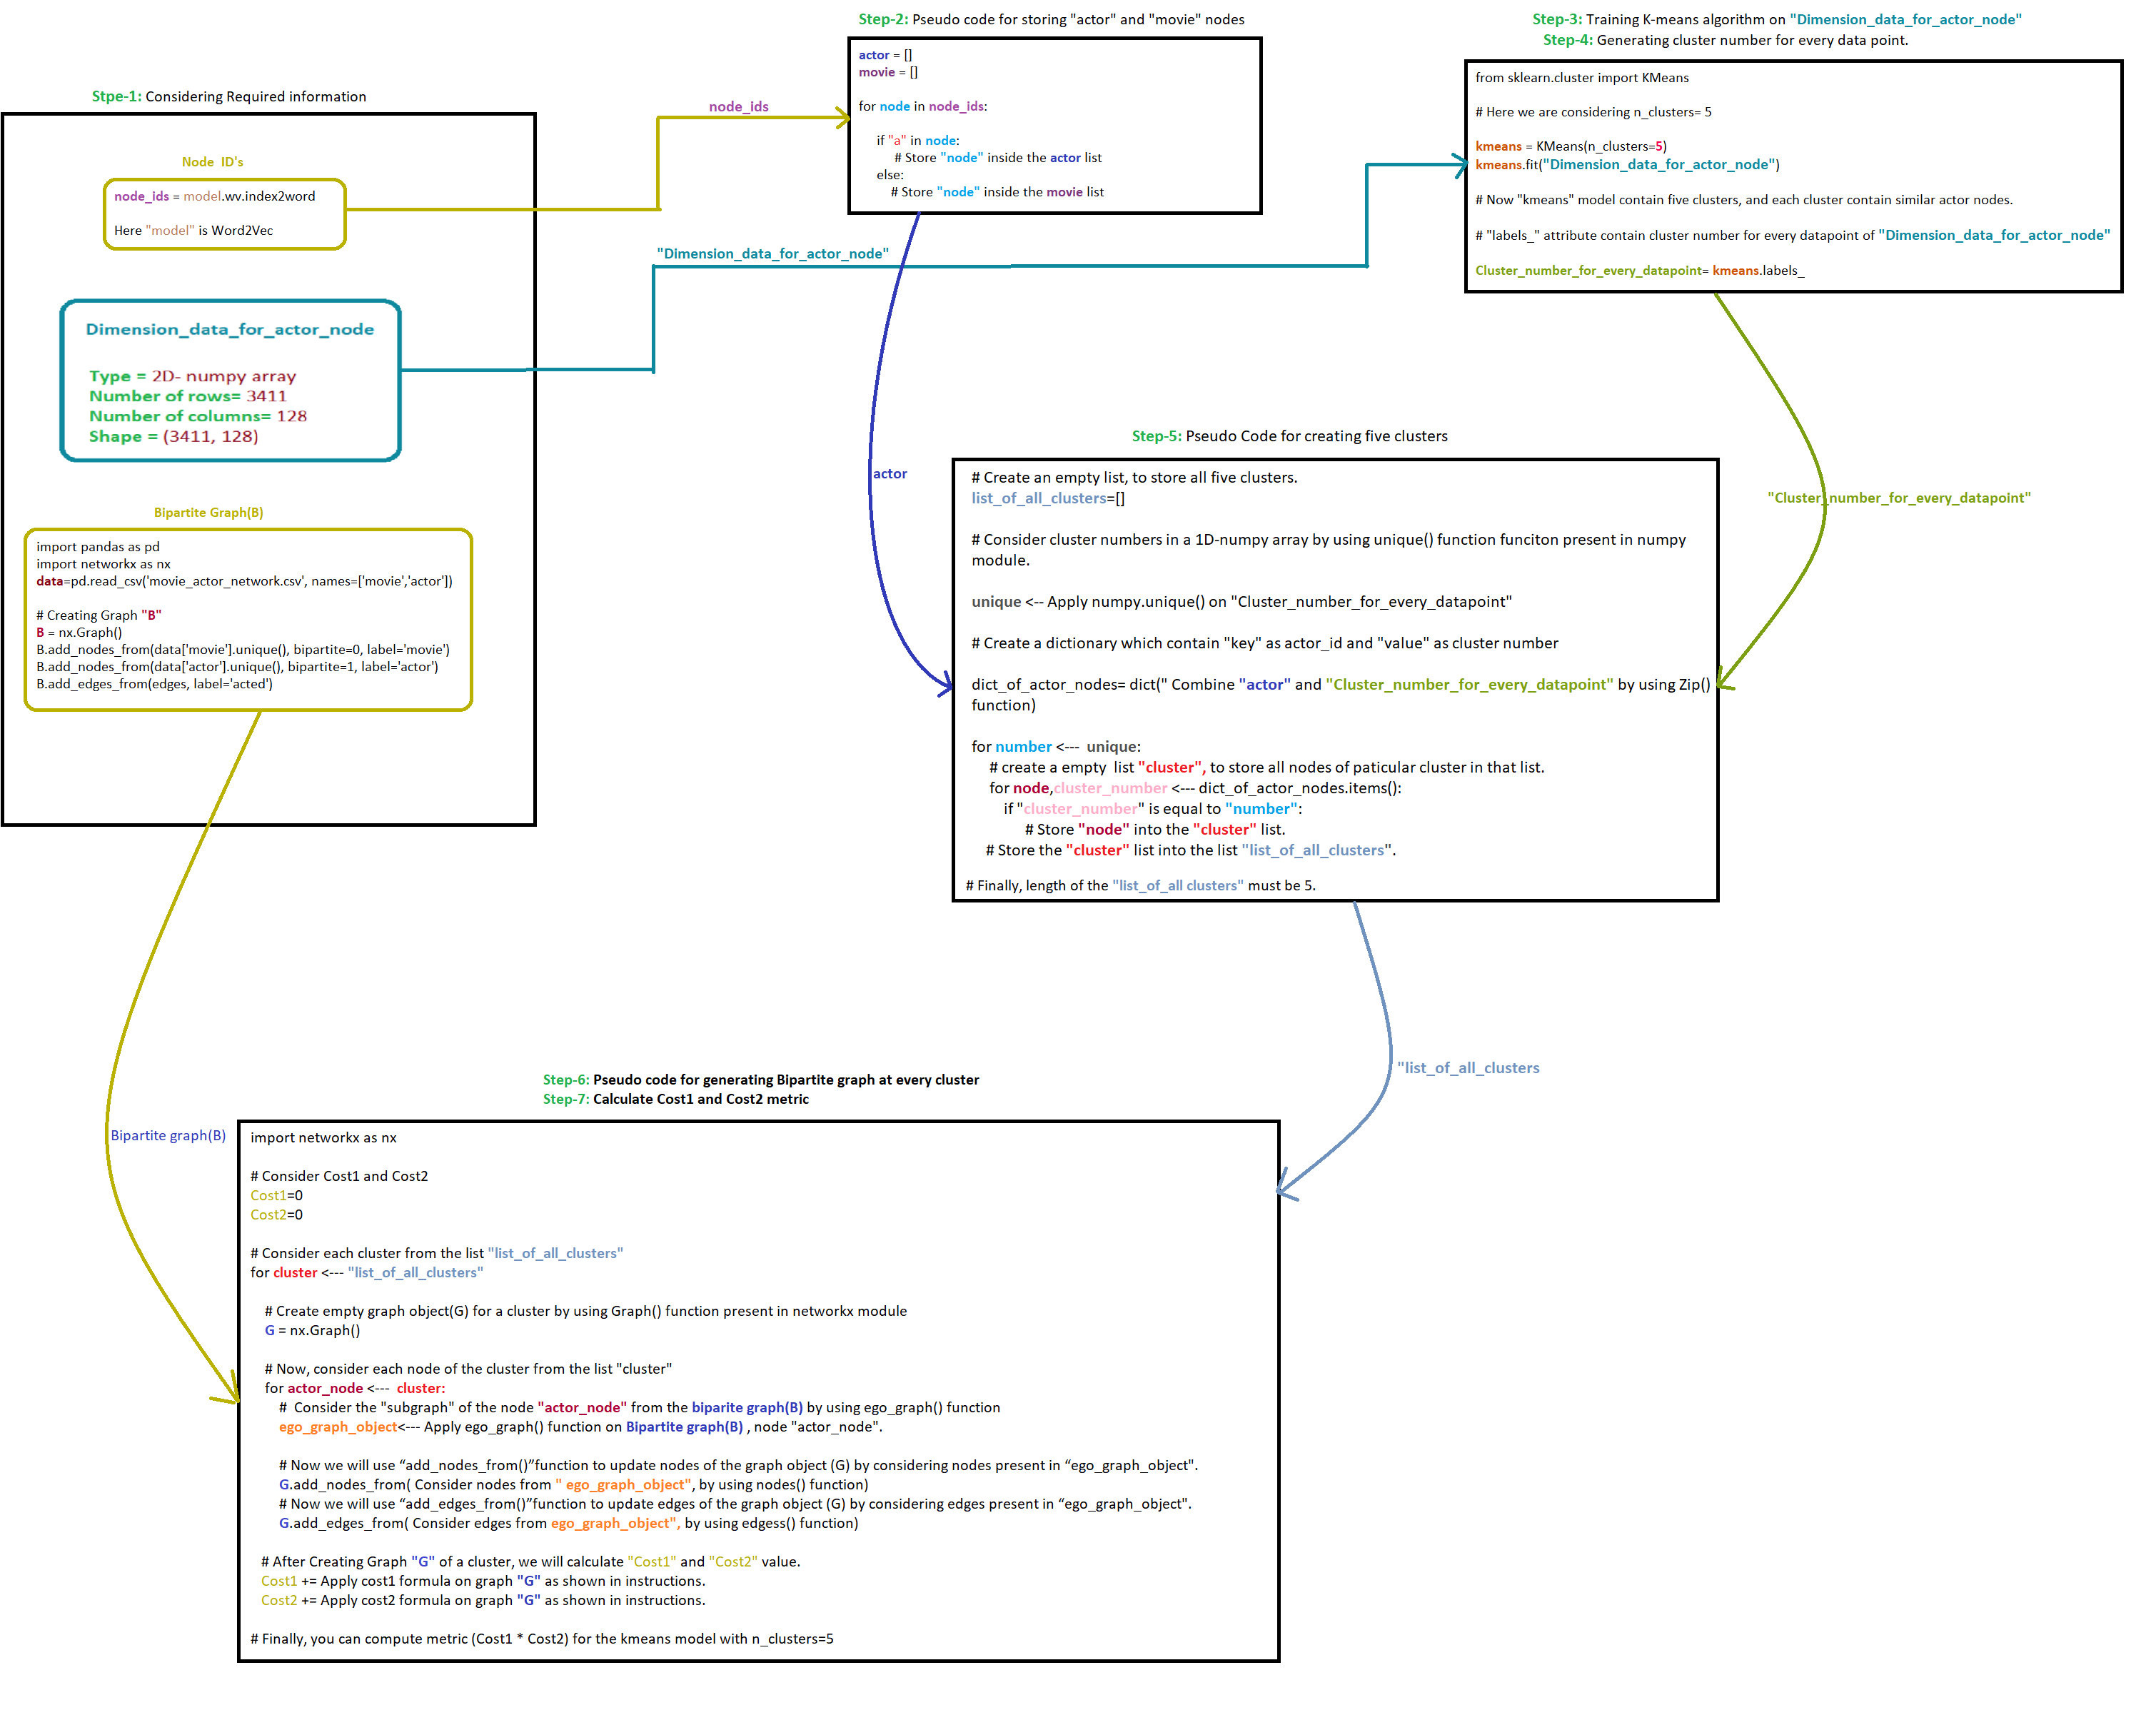

In [3]:
## Source from AAIC 
from IPython.display import Image
Image(filename='ego_graph_for_actor.png')


# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [4]:
!pip install networkx==2.3

     |████████████████████████████████| 1.8MB 2.8MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556408 sha256=ad6b92b969fcfe528cb41a1215d6a940d3057128d806857d5c95fad7f31d92fc
  Stored in directory: /root/.cache/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built networkx
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: networkx 2.4
    Uninstalling networkx-2.4:
      Successfully uninstalled networkx-2.4


In [5]:
!pip install stellargraph

     |████████████████████████████████| 440kB 2.8MB/s 


In [6]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [7]:
from google.colab import files
uploaded = files.upload()

Saving movie_actor_network.csv to movie_actor_network.csv


In [8]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [9]:
edges = [tuple(x) for x in data.values.tolist()]

In [10]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [11]:
A = list(nx.connected_component_subgraphs(B))[0]

In [12]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


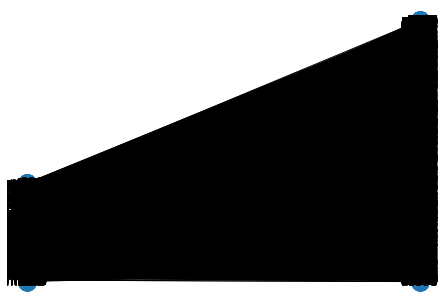

In [13]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [14]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [15]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [16]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [17]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [18]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

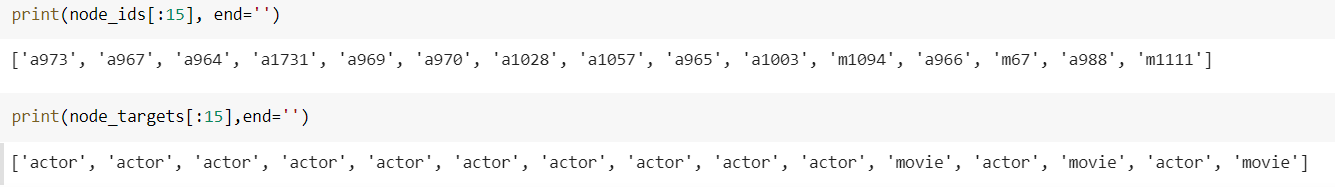

In [19]:
import numpy as np
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    for i in range(len(node_ids)):
      if (node_targets[i]=="actor"):
        actor_embeddings.append(node_embeddings[(i)])
        actor_nodes.append(node_ids[(i)])
      else:
        movie_embeddings.append(node_embeddings[(i)])
        movie_nodes.append(node_ids[(i)])


    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes

    return np.array(actor_nodes),np.array(movie_nodes),np.array(actor_embeddings),np.array(movie_embeddings)


In [20]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings = data_split(node_ids,node_targets,node_embeddings)

In [21]:
print(actor_nodes)
print(len(actor_nodes))
print(movie_nodes)
print(len(movie_nodes))

['a973' 'a967' 'a964' ... 'a1481' 'a3497' 'a1834']
3411
['m1094' 'm67' 'm1100' ... 'm541' 'm776' 'm251']
1292


<font color='cyan'>Graded function - 1</font>

In [22]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Graded function - 2</font>

In [23]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [24]:
'''In this function, we will calculate cost1'''
def cost1(graph,number_of_clusters):
  list_of_graphs =[]
  large_cc = max(nx.connected_components(graph),key=len)
  length = graph.nodes
  total = len(large_cc)/len(length)
  list_of_graphs.append(total)
  cost1 = sum(list_of_graphs)/number_of_clusters
  return cost1

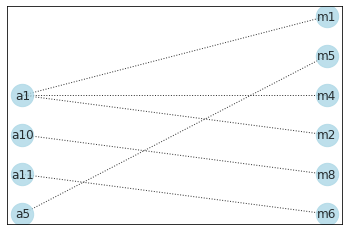

In [25]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Graded function - 3</font>

In [26]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [27]:
'''In this function, we will calculate cost1'''
def cost2(graph,number_of_clusters):
  list_of_graph_deg =[]
  deg =[]
  for i in graph.nodes():
    if i not in l:
      deg.append(graph.degree[i])
  if len(deg) == 0:
    total = sum(deg)/(len(deg)+1)
  else:
    total = sum(deg)/len(deg)
    list_of_graph_deg.append(total)
  cost2 = sum(list_of_graph_deg)/number_of_clusters
  return cost2

<font color='cyan'>Graded function - 4</font>

In [28]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [29]:
actor = []
for i in range(len(node_ids)):
  if 'a' in node_ids[i]:
    actor.append(i)

In [30]:
from tqdm import tqdm
from sklearn.cluster import KMeans

cost = []
number_of_clusters = [3, 5, 10, 30, 50, 100, 200, 500]

for number in number_of_clusters:
  cost_sum = 0
  kmeans = KMeans(n_clusters=number,n_jobs=-1).fit(actor_embeddings)                     ## fitting model
  indices = list(0 for i in range(0, number))                                            ## Creating an lsit of zeros for each cluster

  for i in range(number):
    indices[i] = []                                                                      ## Creating an empty list for ith index in range of cluster
 
  for i in range(len(kmeans.labels_)):                        
    indices[kmeans.labels_[i]].append(i)                                                   ## Appening the algo labels of ith position to Indices ith index of indices list

  clusterID = list(0 for i in range(0, number))

  for i in range(number):
    clusterID[i] = ['a'+ str(actor[j]) for j in indices[i]]                                 ## Actor clusters

  edge = [0]*number                                                

  for indices in range(number):
    edge[indices] = []

    edge[indices] = [i for i in edges for j in clusterID[indices] if j in i]                     
    Ego = nx.Graph()
    Ego.add_nodes_from(clusterID[indices],bipartite =0,label='actor')                          ## Adding nodes
    Ego.add_edges_from(edge[indices],label='acted')                                            ## Adding edges
    C1 = cost1(Ego,number)                                                                ## Cost1 calculation
    C2 = cost2(Ego,number)                                                                ## Cost2 calculation

    cost_sum = C1 * C2
  cost.append(cost_sum)                                                                 ## Total cost ( cost1 * cost2) is appened to cost list

In [32]:
## Converting the lists of clusters and it's cost values into dict via zip
import operator
high_k_value = dict(zip(number_of_clusters, cost))
cluster_max_cost=max(high_k_value.items(), key=operator.itemgetter(1))[0]
print(high_k_value)
## Calcualting the max cost value clusters
print("cluster with maximum cost",cluster_max_cost)

{3: 0.11718644232158602, 5: 0.039425924030997386, 10: 0.0034301442516892306, 30: 0.0, 50: 1.774213509566595e-05, 100: 2.6370510396975426e-05, 200: 3.3333333333333335e-05, 500: 4e-06}
cluster with maximum cost 3


In [33]:
## algo with max cost cluster value
km = KMeans(n_clusters=3, random_state=0).fit(actor_embeddings)
labels_node=km.labels_

In [34]:
from sklearn.manifold import TSNE
transform = TSNE
trans = transform(n_components=2)
actor_embeddings_2d = trans.fit_transform(actor_embeddings)

## Converting the 128 dimenstions into 2D

<font color='blue'>Displaying similar actor clusters</font>

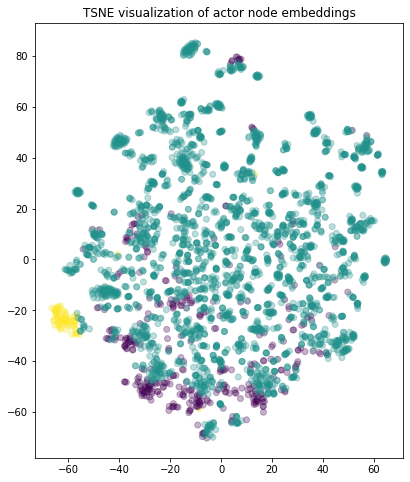

In [35]:
import numpy as np

label_map = { l: i for i, l in enumerate(np.unique(km.labels_))}
node_colours = [label_map[target] for target in km.labels_]
plt.figure(figsize=(8,8))
plt.axes().set(aspect="equal")
plt.scatter(actor_embeddings_2d[:,0],
actor_embeddings_2d[:,1],
c=node_colours, alpha=0.3)
plt.title('{} visualization of actor node embeddings'.format(transform.__name__))
plt.show()


<font color='blue'>Grouping similar movies</font>

In [37]:
movie = []
for i in range(len(node_ids)):
  if 'm' in node_ids[i]:
    movie.append(i)

In [39]:
from tqdm import tqdm
from sklearn.cluster import KMeans

cost = []
number_of_clusters = [3, 5, 10, 30, 50, 100, 200, 500]

for number in number_of_clusters:
  cost_sum = 0
  kmeans = KMeans(n_clusters=number,n_jobs=-1).fit(movie_embeddings)                     ## fitting model
  indices = list(0 for i in range(0, number))                                            ## Creating an lsit of zeros for each cluster

  for i in range(number):
    indices[i] = []                                                                      ## Creating an empty list for ith index in range of cluster
 
  for i in range(len(kmeans.labels_)):                        
    indices[kmeans.labels_[i]].append(i)                                                   ## Appening the algo labels of ith position to Indices ith index of indices list

  clusterID = list(0 for i in range(0, number))

  for i in range(number):
    clusterID[i] = ['a'+ str(movie[j]) for j in indices[i]]                                 ## Actor clusters

  edge = [0]*number                                                

  for indices in range(number):
    edge[indices] = []

    edge[indices] = [i for i in edges for j in clusterID[indices] if j in i]                     
    Ego = nx.Graph()
    Ego.add_nodes_from(clusterID[indices],bipartite =0,label='movie')                          ## Adding nodes
    Ego.add_edges_from(edge[indices],label='movies')                                            ## Adding edges
    C1 = cost1(Ego,number)                                                                ## Cost1 calculation
    C2 = cost2(Ego,number)                                                                ## Cost2 calculation

    cost_sum = C1 * C2
  cost.append(cost_sum)                                                                 ## Total cost ( cost1 * cost2) is appened to cost list

In [40]:
## Converting the lists of clusters and it's cost values into dict via zip
import operator
high_k_value = dict(zip(number_of_clusters, cost))
cluster_max_cost=max(high_k_value.items(), key=operator.itemgetter(1))[0]
print(high_k_value)
## Calcualting the max cost value clusters
print("cluster with maximum cost",cluster_max_cost)

{3: 0.20894832185223408, 5: 0.018451923076923078, 10: 0.011590532034801992, 30: 0.00012009757928316758, 50: 7.424152290303391e-05, 100: 0.0001, 200: 2.5e-05, 500: 4e-06}
cluster with maximum cost 3


In [42]:
## algo with max cost cluster value
km = KMeans(n_clusters=3, random_state=0).fit(movie_embeddings)
labels_node=km.labels_

In [44]:
from sklearn.manifold import TSNE
transform = TSNE
trans = transform(n_components=2)
movie_embeddings_2d = trans.fit_transform(movie_embeddings)

## Converting the 128 dimenstions into 2D

<font color='blue'>Displaying similar movie clusters</font>

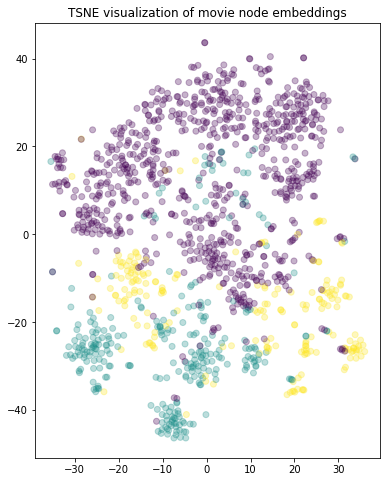

In [46]:
import numpy as np

label_map = { l: i for i, l in enumerate(np.unique(km.labels_))}
node_colours = [label_map[target] for target in km.labels_]
plt.figure(figsize=(8,8))
plt.axes().set(aspect="equal")
plt.scatter(movie_embeddings_2d[:,0],movie_embeddings_2d[:,1],c=node_colours, alpha=0.3)
plt.title('{} visualization of movie node embeddings'.format(transform.__name__))
plt.show()